# Confidence Intervals and Dispersion

In [ ]:
#@title Imports

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
pd.set_option('display.max_colwidth', None)
import math

from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from statsmodels.graphics.mosaicplot import mosaic #new import
import statsmodels.api as sm

import ipywidgets as widgets
from IPython.display import display, HTML

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Define Functions

def iqr(data):
  '''
  Returns the interquartile range (IQR) of numeric data.
  '''
  return data.quantile(0.75) - data.quantile(0.25)

def title_display(df, title):
  '''
  Displays a DataFrame with a specified title.
  '''
  display(HTML(f"<h3>{title}</h3>"))
  display(df)

In [ ]:
#@title #Download File and Select Data

#@markdown Make sure the file containing the data you wish to analyze is in your Google Drive
file_type = "xlsx" #@param ["csv", "xlsx"]
file_name = 'Cars 1993.xlsx' #@param ["estradiol.csv", "Hot Dogs.xlsx"] {type:"string", allow-input: true}
# Hot Dogs.xlsx
#@markdown Check the below box to inspect the imported data.
show_frame = True #@param {type:"boolean"}
#@markdown Show just first five? (Reduces screen clutter)
first_five = True #@param {type:"boolean"}

file_path = f"/content/drive/MyDrive/{file_name}"

match file_type:
  case "csv":
    data = pd.read_csv(file_path)
  case "xlsx":
    data = pd.read_excel(file_path)

#@markdown ---
if show_frame:
  if first_five:
    display(data.head())
  else:
    display(data)

,Manufacturer,Model,Vehicle Category,Minimum Price ($1000),Midrange Price ($1000),Maximum Price ($1000),City Mileage (MPG),Highway Mileage (MPG),Air Bags Standard,Drive Train Type,...,Fuel Tank Capacity,Passenger Capacity,Length (inches),Wheel Base (inches),Width (inches),U-Turn Space (feet),Rear Seat Room (inches),Luggage Capacity (cu. ft.),Weight (pounds),Domestic Manufacturer
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,0,1,...,13.2,5,177,102,68,37,26.5,11.0,2705,0
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,2,1,...,18.0,5,195,115,71,38,30.0,15.0,3560,0
2,Audi,90,Compact,25.9,29.1,32.3,20,26,1,1,...,16.9,5,180,102,67,37,28.0,14.0,3375,0
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,2,1,...,21.1,6,193,106,70,37,31.0,17.0,3405,0
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,1,0,...,21.1,4,186,109,69,39,27.0,13.0,3640,0


# Distributions

In [ ]:
data = data.select_dtypes('number')

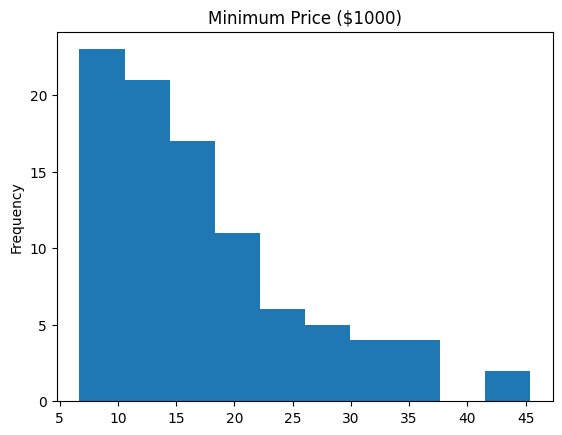

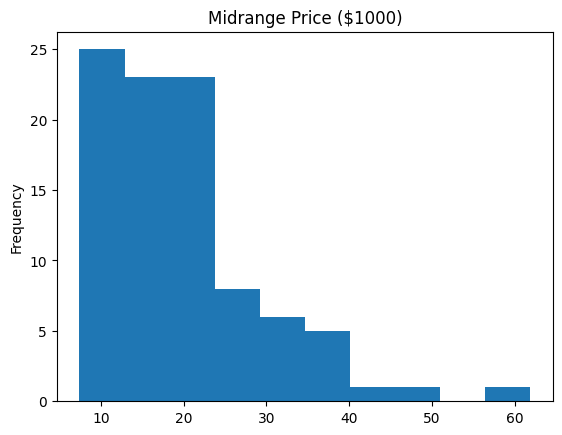

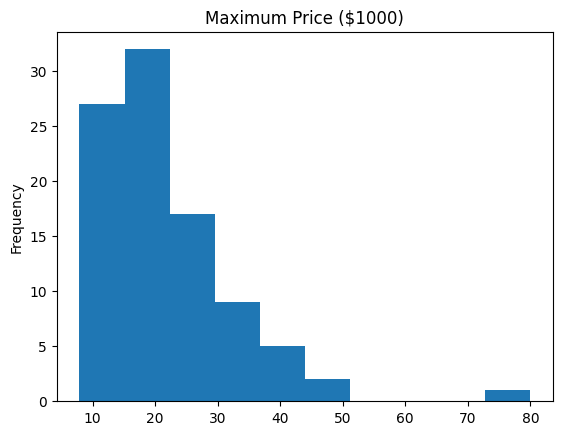

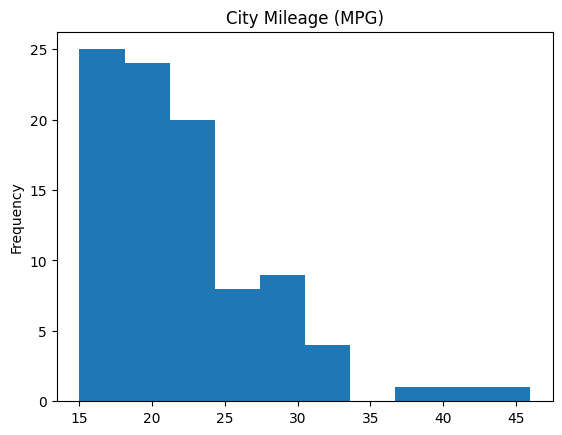

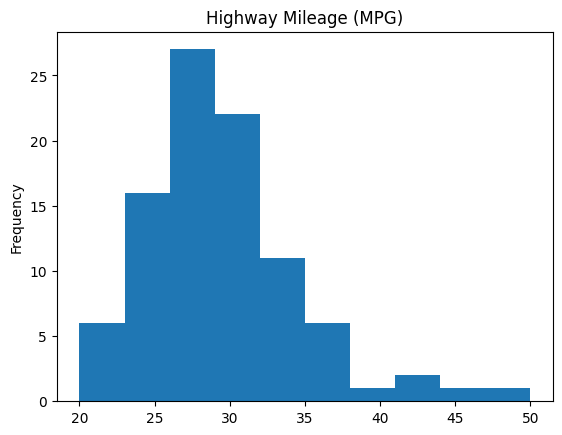

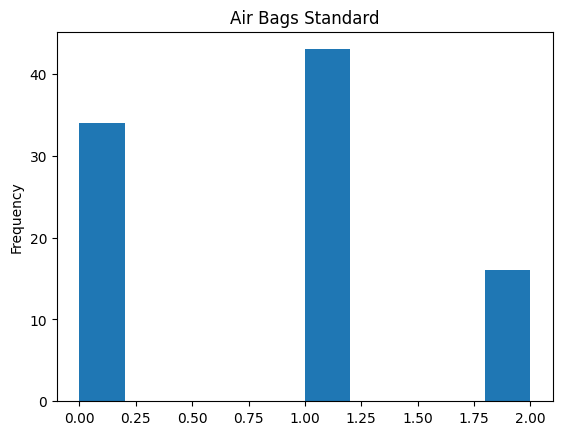

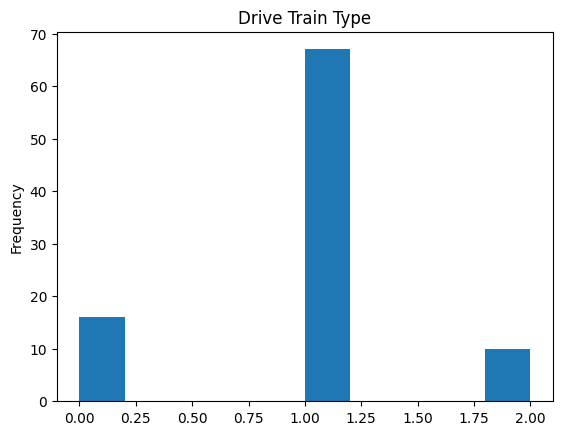

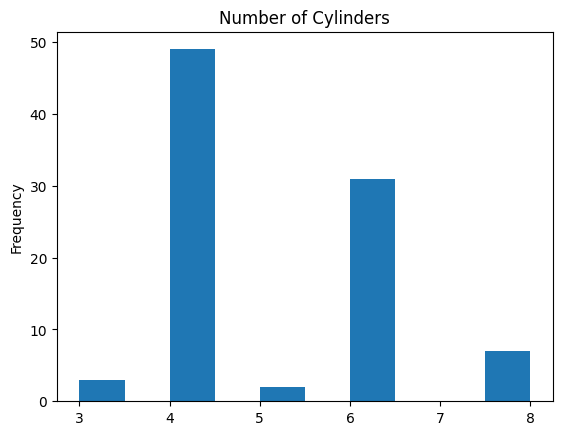

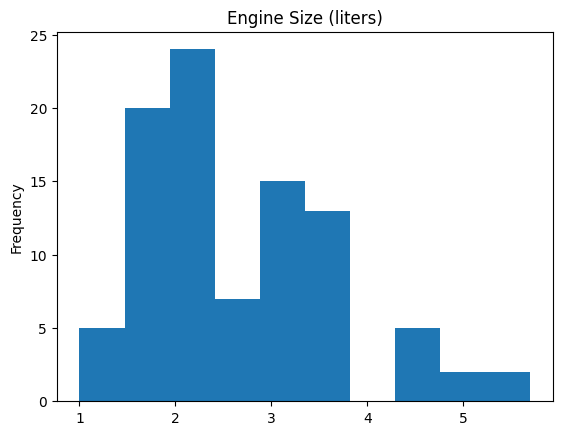

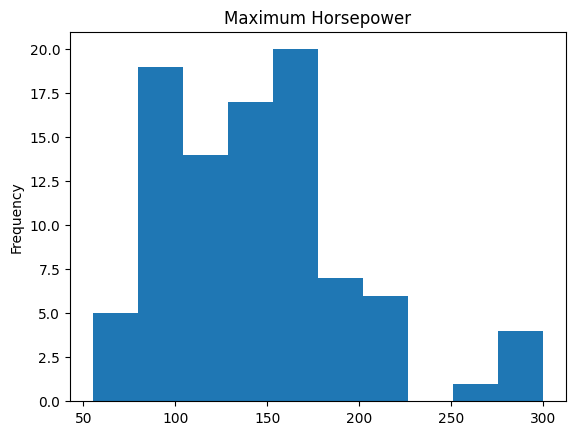

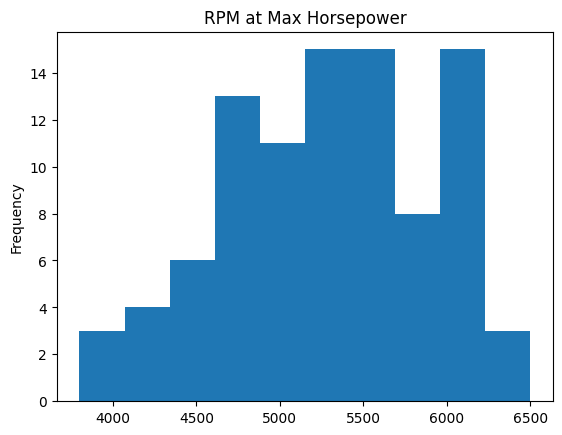

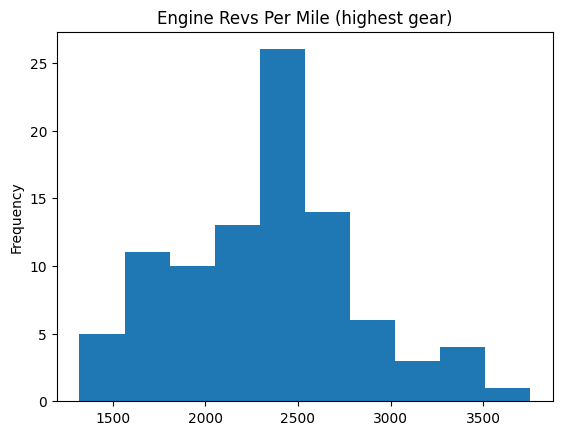

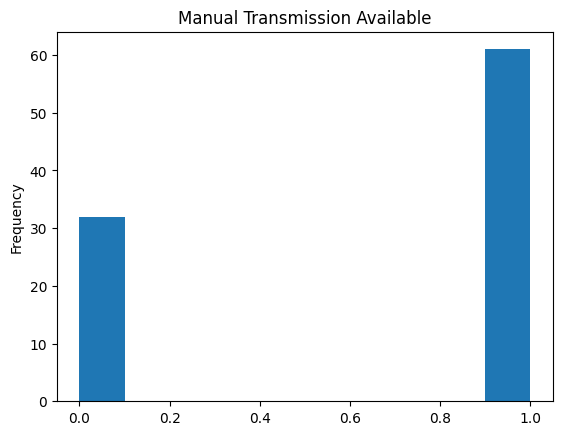

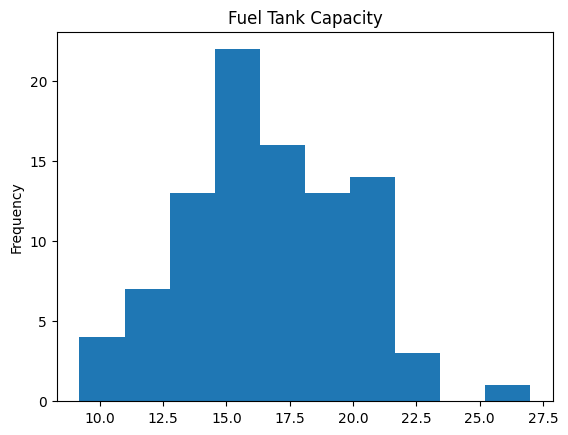

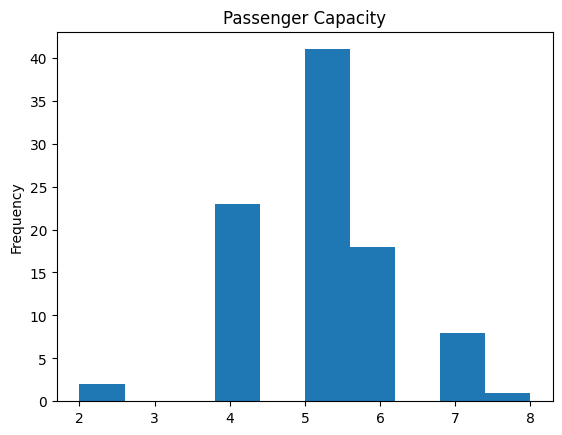

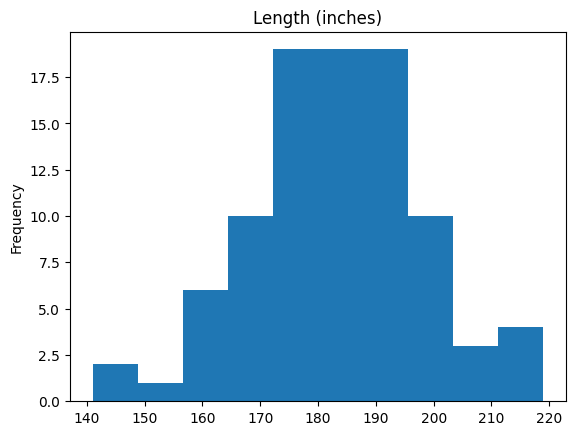

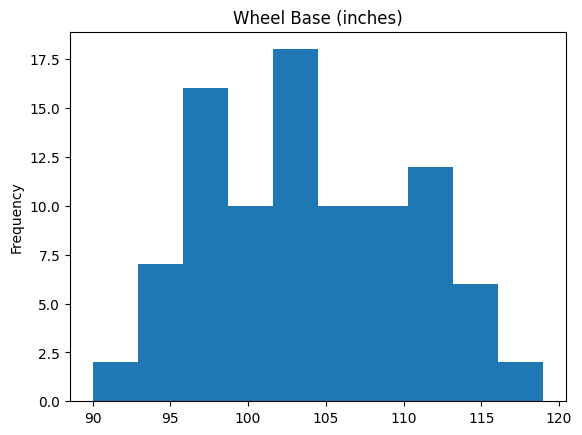

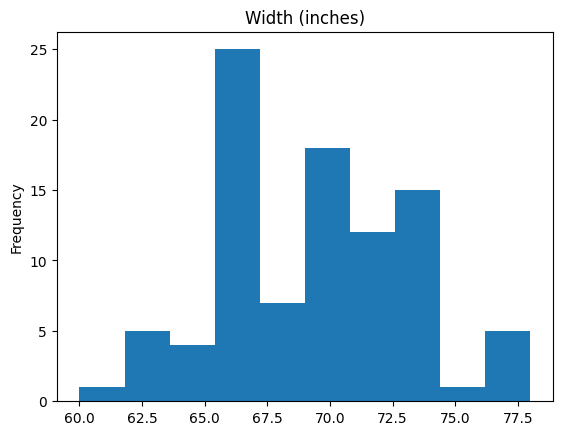

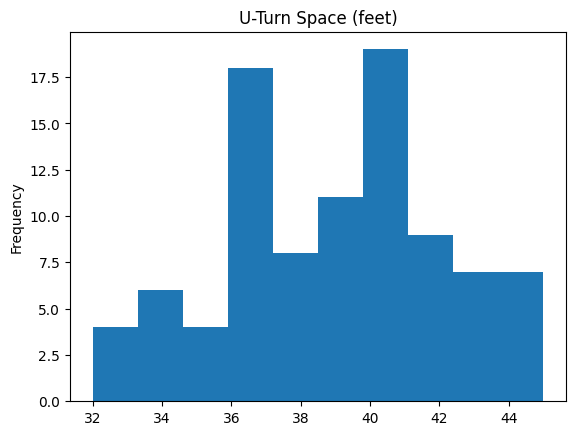

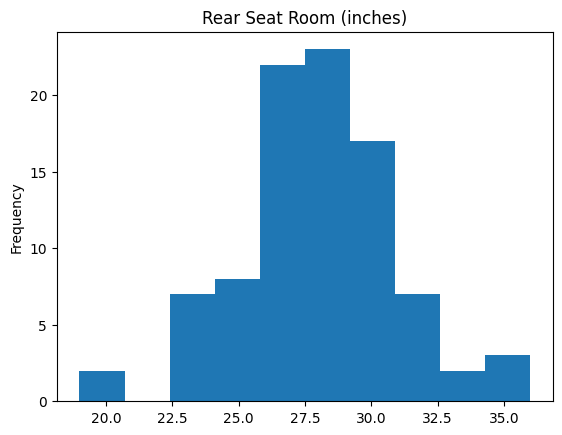

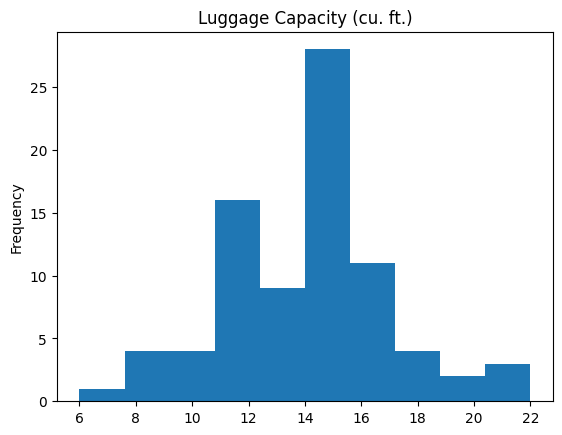

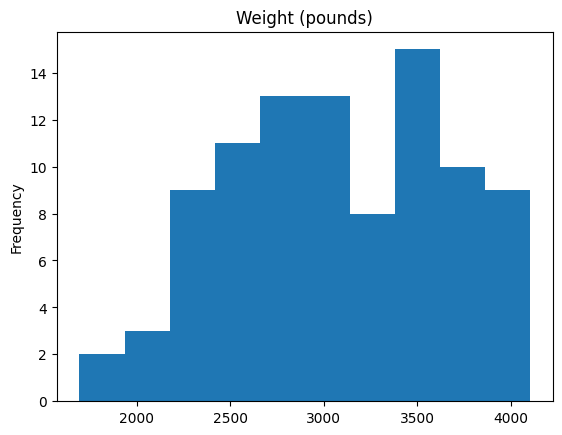

In [ ]:
#@title Histograms
for col in data.columns:
  plt.figure()
  data[col].plot.hist(title=col)
plt.close()

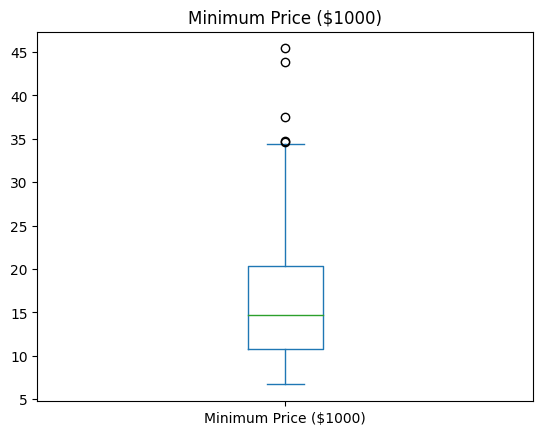

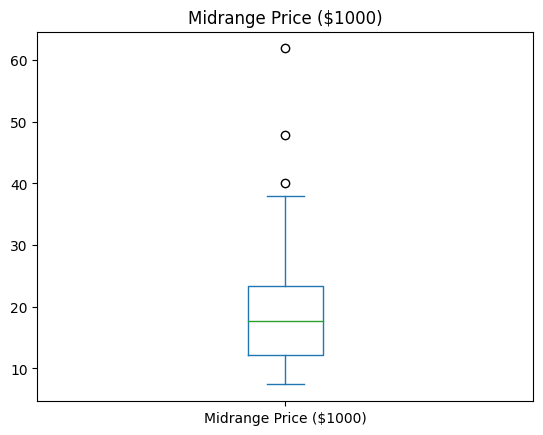

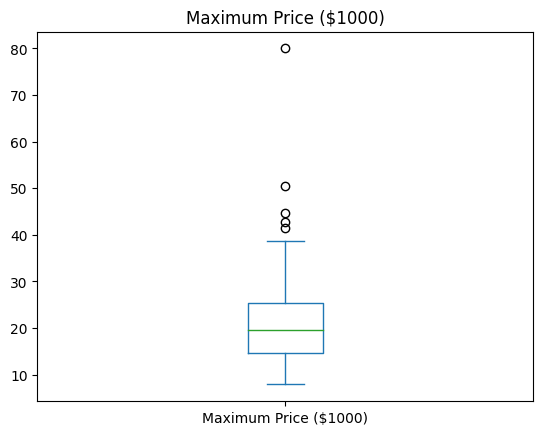

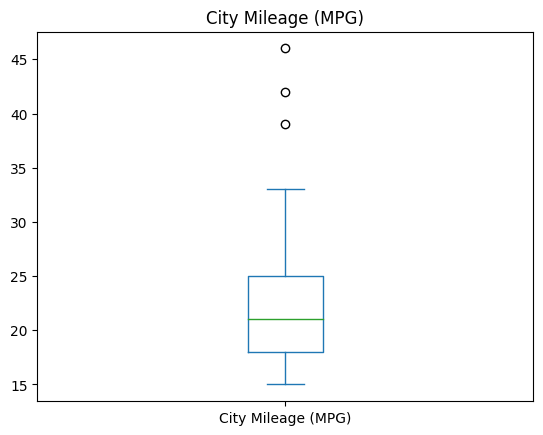

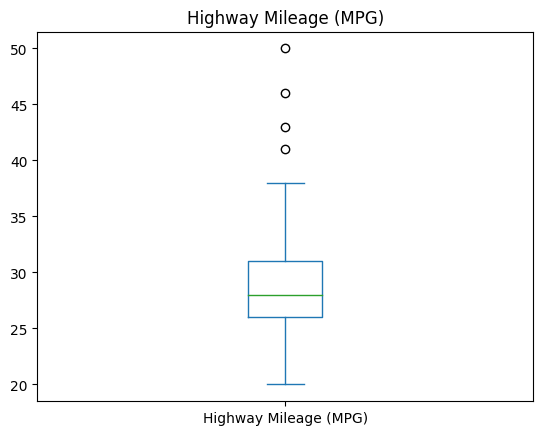

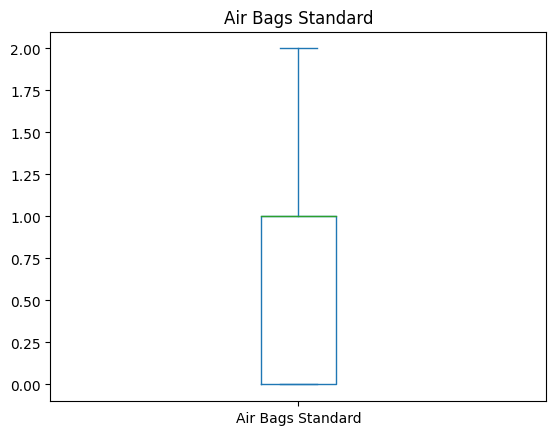

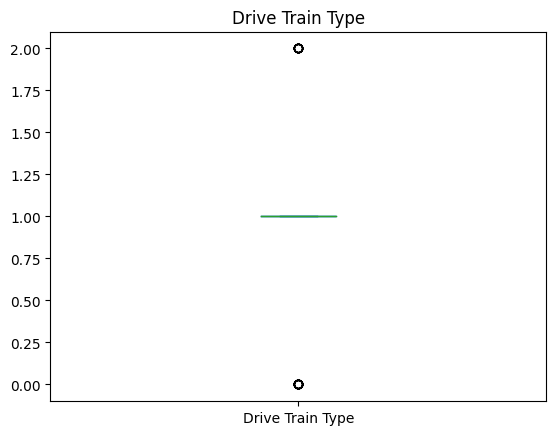

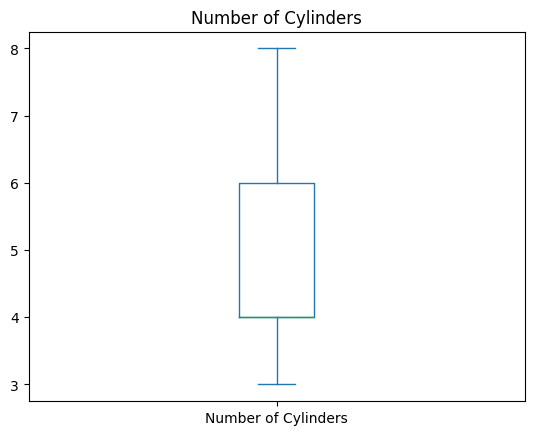

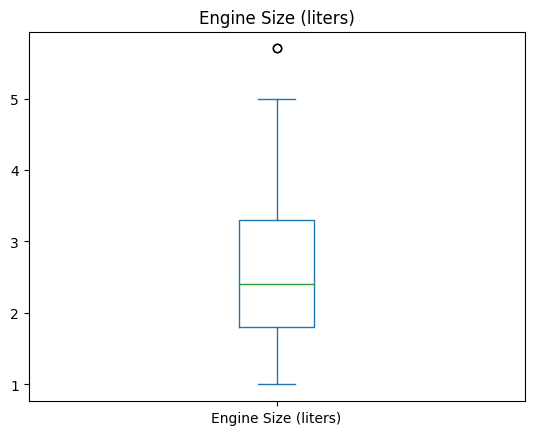

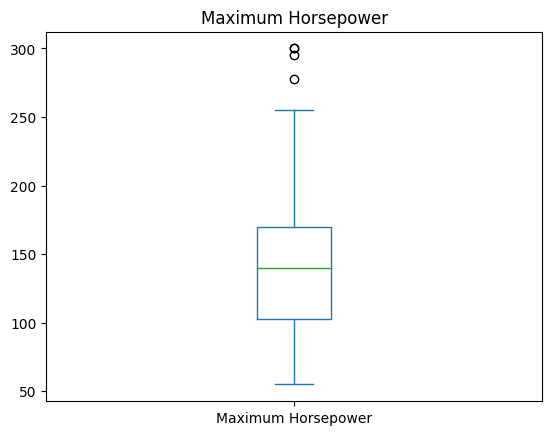

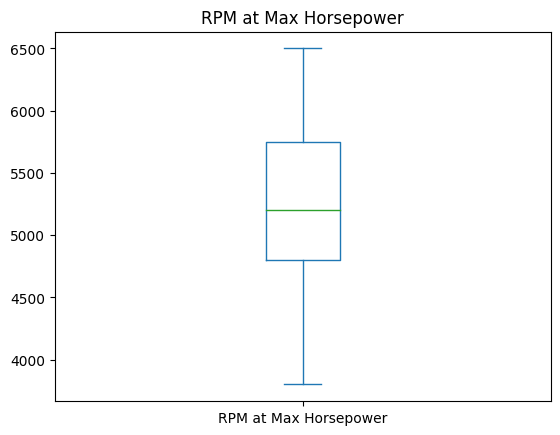

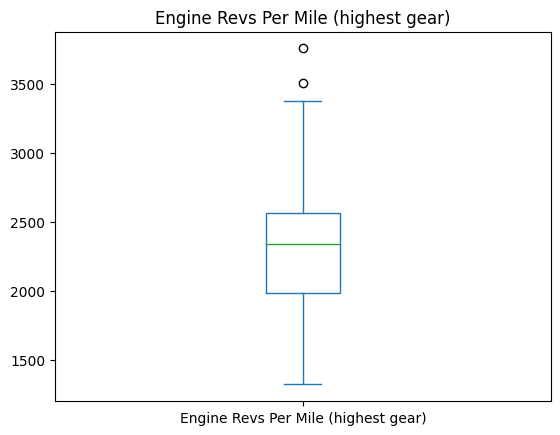

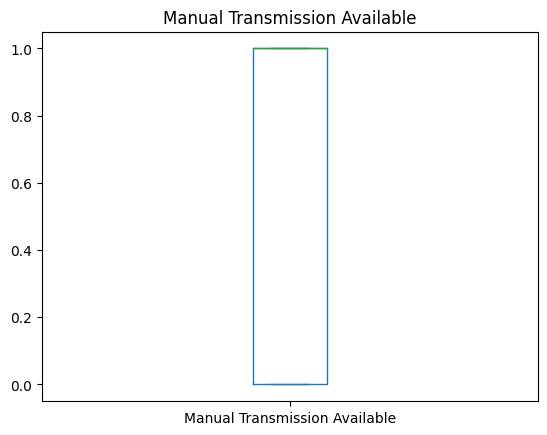

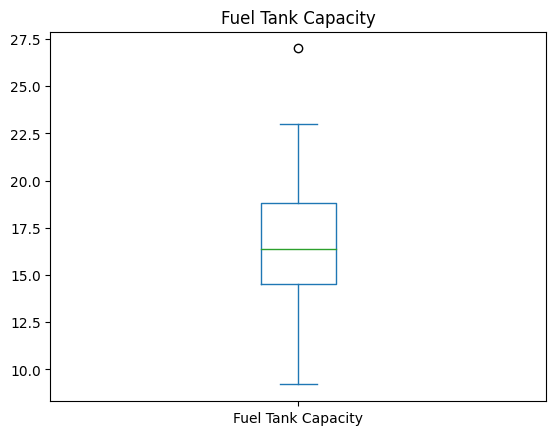

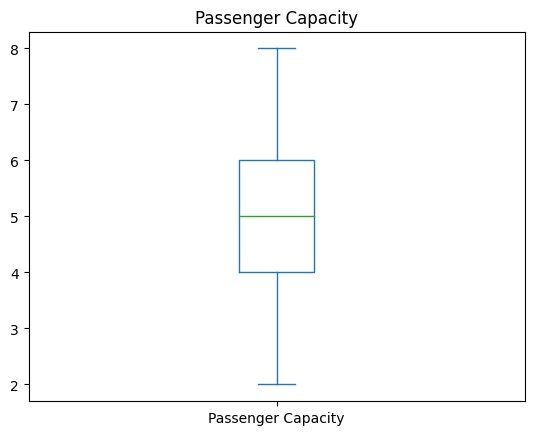

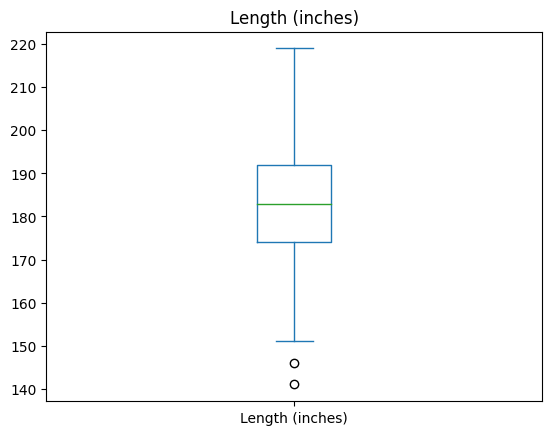

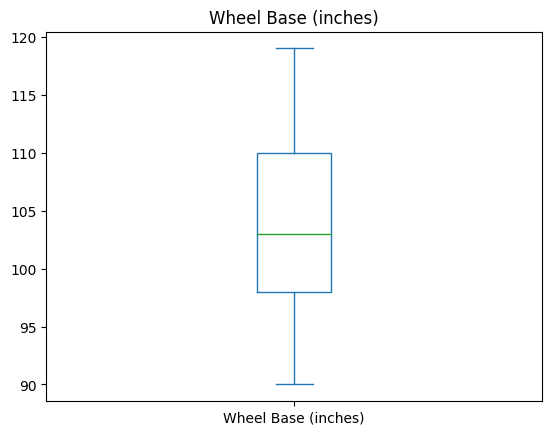

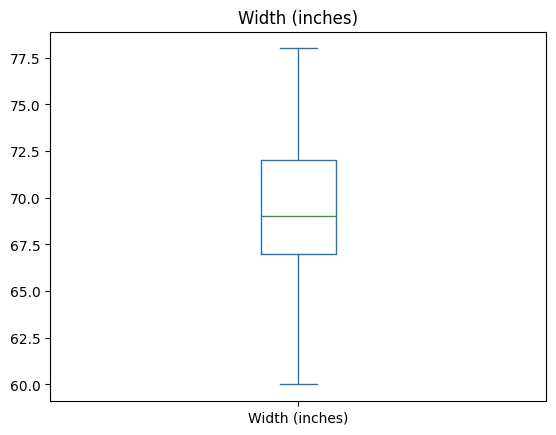

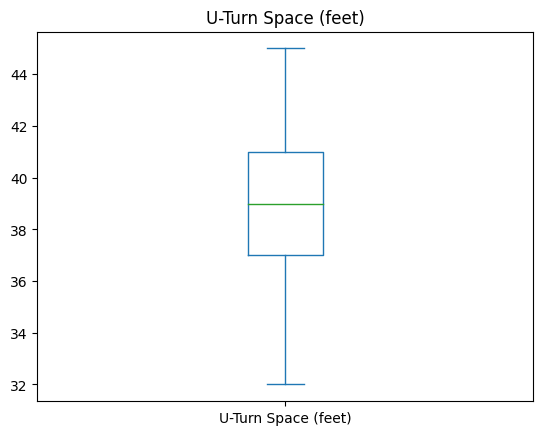

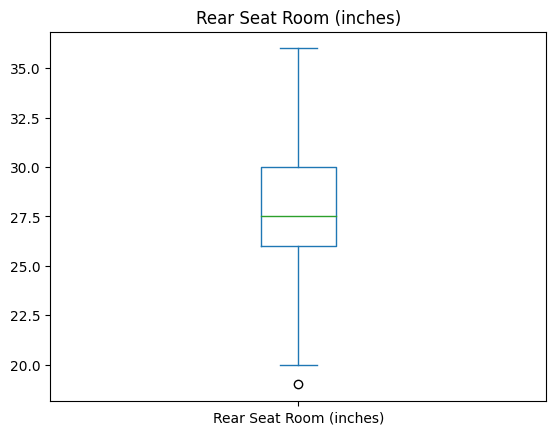

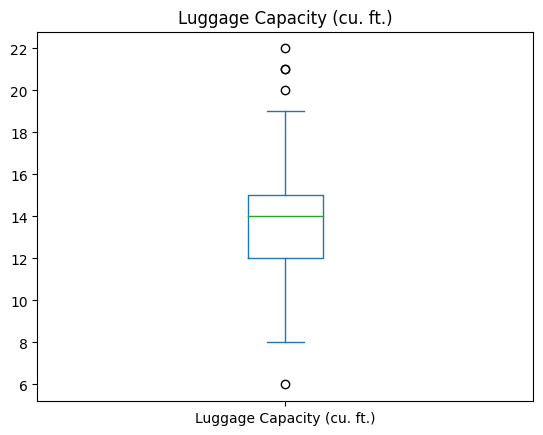

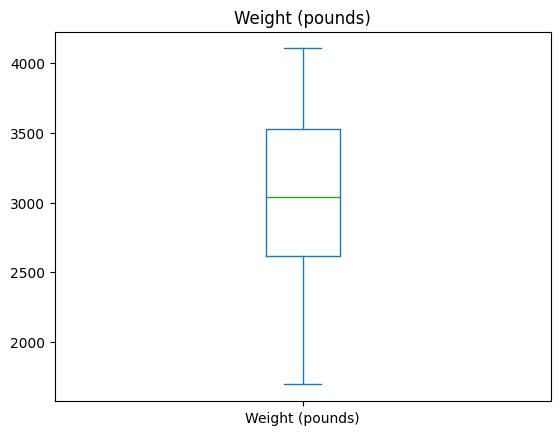

In [ ]:
#@title Boxplots
for col in data.columns:
  plt.figure()
  data[col].plot.box(title=col)
plt.close()

In [ ]:
#@title Summary Statistics
crit_t = stats.t.ppf(1-0.025,df=(N:=len(data)-1))
for col in data.columns:
  statistics = {
      'Mean': [mean:=data[col].mean()],
      'Std Dev': [data[col].std()],
      'Std Err Mean': [sem:=data[col].sem()],
      'Lower 95%': [mean - crit_t*sem],
      'Upper 95%': [mean + crit_t*sem],
      'N': [N],
      'Sum': [data[col].sum()],
      'Variance': [data[col].var()],
      'Skewness': [data[col].skew()],
      'Kurtosis': [data[col].kurtosis()],
      'Minimum': [data[col].min()],
      'Maximum': [data[col].max()],
      'Median': [data[col].median()],
      'Mode': [min_mode:=min(mode:=list(data[col].mode()))],
      'IQR': [stats.iqr(data[col], nan_policy='omit')],

  }
  title_display(pd.DataFrame(statistics).T, col)
  print(f"Note: The mode shown is the smallest of {len(mode)} modes with a count of {data[col].value_counts()[min_mode]}."
        if len(mode) > 1 else "")

,0
Mean,17.125806
Std Dev,8.746029
Std Err Mean,0.906921
Lower 95%,15.324583
Upper 95%,18.927030
N,92.000000
Sum,1592.700000
Variance,76.493022
Skewness,1.182989
Kurtosis,1.019419


Note: The mode shown is the smallest of 2 modes with a count of 3.


,0
Mean,19.509677
Std Dev,9.659430
Std Err Mean,1.001636
Lower 95%,17.520341
Upper 95%,21.499013
N,92.000000
Sum,1814.400000
Variance,93.304579
Skewness,1.533082
Kurtosis,3.429123


,0
Mean,21.898925
Std Dev,11.030457
Std Err Mean,1.143805
Lower 95%,19.627229
Upper 95%,24.170620
N,92.000000
Sum,2036.600000
Variance,121.670977
Skewness,2.033859
Kurtosis,7.439426


Note: The mode shown is the smallest of 4 modes with a count of 3.


,0
Mean,22.365591
Std Dev,5.619812
Std Err Mean,0.582747
Lower 95%,21.208205
Upper 95%,23.522978
N,92.000000
Sum,2080.000000
Variance,31.582281
Skewness,1.704430
Kurtosis,4.004306


,0
Mean,29.086022
Std Dev,5.331726
Std Err Mean,0.552874
Lower 95%,27.987966
Upper 95%,30.184077
N,92.000000
Sum,2705.000000
Variance,28.427302
Skewness,1.229897
Kurtosis,2.614201


,0
Mean,0.806452
Std Dev,0.711063
Std Err Mean,0.073734
Lower 95%,0.660010
Upper 95%,0.952893
N,92.000000
Sum,75.000000
Variance,0.505610
Skewness,0.299206
Kurtosis,-0.971321


,0
Mean,0.935484
Std Dev,0.527637
Std Err Mean,0.054713
Lower 95%,0.826818
Upper 95%,1.044149
N,92.000000
Sum,87.000000
Variance,0.278401
Skewness,-0.076960
Kurtosis,0.656307


,0
Mean,4.967391
Std Dev,1.304692
Std Err Mean,0.136024
Lower 95%,4.697237
Upper 95%,5.237546
N,92.000000
Sum,457.000000
Variance,1.702222
Skewness,0.820190
Kurtosis,-0.204359


,0
Mean,2.667742
Std Dev,1.037363
Std Err Mean,0.107570
Lower 95%,2.454100
Upper 95%,2.881384
N,92.000000
Sum,248.100000
Variance,1.076122
Skewness,0.859418
Kurtosis,0.381025


,0
Mean,143.827957
Std Dev,52.374410
Std Err Mean,5.430973
Lower 95%,133.041575
Upper 95%,154.614339
N,92.000000
Sum,13376.000000
Variance,2743.078775
Skewness,0.951728
Kurtosis,1.110883


Note: The mode shown is the smallest of 2 modes with a count of 7.


,0
Mean,5280.645161
Std Dev,596.731690
Std Err Mean,61.878194
Lower 95%,5157.749727
Upper 95%,5403.540595
N,92.000000
Sum,491100.000000
Variance,356088.709677
Skewness,-0.258533
Kurtosis,-0.409479


,0
Mean,2332.204301
Std Dev,496.506525
Std Err Mean,51.485328
Lower 95%,2229.949995
Upper 95%,2434.458607
N,92.000000
Sum,216895.000000
Variance,246518.729547
Skewness,0.281546
Kurtosis,0.220544


Note: The mode shown is the smallest of 2 modes with a count of 3.


,0
Mean,0.655914
Std Dev,0.477644
Std Err Mean,0.049529
Lower 95%,0.557544
Upper 95%,0.754284
N,92.000000
Sum,61.000000
Variance,0.228144
Skewness,-0.667194
Kurtosis,-1.589511


,0
Mean,16.664516
Std Dev,3.279370
Std Err Mean,0.340055
Lower 95%,15.989138
Upper 95%,17.339894
N,92.000000
Sum,1549.800000
Variance,10.754271
Skewness,0.108146
Kurtosis,0.127206


Note: The mode shown is the smallest of 2 modes with a count of 9.


,0
Mean,5.086022
Std Dev,1.038979
Std Err Mean,0.107737
Lower 95%,4.872046
Upper 95%,5.299997
N,92.000000
Sum,473.000000
Variance,1.079476
Skewness,0.062517
Kurtosis,0.936193


,0
Mean,183.204301
Std Dev,14.602382
Std Err Mean,1.514196
Lower 95%,180.196976
Upper 95%,186.211626
N,92.000000
Sum,17038.000000
Variance,213.229547
Skewness,-0.090095
Kurtosis,0.449250


Note: The mode shown is the smallest of 2 modes with a count of 5.


,0
Mean,103.946237
Std Dev,6.819674
Std Err Mean,0.707167
Lower 95%,102.541741
Upper 95%,105.350732
N,92.000000
Sum,9667.000000
Variance,46.507948
Skewness,0.113727
Kurtosis,-0.797456


,0
Mean,69.376344
Std Dev,3.778986
Std Err Mean,0.391863
Lower 95%,68.598071
Upper 95%,70.154617
N,92.000000
Sum,6452.000000
Variance,14.280739
Skewness,0.264027
Kurtosis,-0.246428


,0
Mean,38.956989
Std Dev,3.223265
Std Err Mean,0.334237
Lower 95%,38.293166
Upper 95%,39.620813
N,92.000000
Sum,3623.000000
Variance,10.389434
Skewness,-0.133569
Kurtosis,-0.732204


,0
Mean,27.829670
Std Dev,2.989072
Std Err Mean,0.313340
Lower 95%,27.207350
Upper 95%,28.451990
N,92.000000
Sum,2532.500000
Variance,8.934554
Skewness,0.078260
Kurtosis,0.894682


Note: The mode shown is the smallest of 2 modes with a count of 9.


,0
Mean,13.890244
Std Dev,2.997967
Std Err Mean,0.331070
Lower 95%,13.232710
Upper 95%,14.547778
N,92.000000
Sum,1139.000000
Variance,8.987805
Skewness,0.229566
Kurtosis,0.549688


,0
Mean,3072.903226
Std Dev,589.896510
Std Err Mean,61.169419
Lower 95%,2951.415481
Upper 95%,3194.390971
N,92.000000
Sum,285780.000000
Variance,347977.892707
Skewness,-0.143669
Kurtosis,-0.855116


Note: The mode shown is the smallest of 12 modes with a count of 2.


,0
Mean,0.516129
Std Dev,0.502448
Std Err Mean,0.052101
Lower 95%,0.412651
Upper 95%,0.619607
N,92.000000
Sum,48.000000
Variance,0.252454
Skewness,-0.065613
Kurtosis,-2.040045
